<a href="https://colab.research.google.com/github/hrsantos99/RecommendationSystem/blob/main/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -qq "/content/drive/MyDrive/E-commerce Dataset/archive.zip"

In [4]:
!pip install tensorflow
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

In [5]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
import cv2
import numpy as np

In [8]:
def extract_feature(img_path, model):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(224,224))
  img=np.array(img)
  expand_img=np.expand_dims(img,axis=0)
  pre_img=preprocess_input(expand_img)
  result=model.predict(pre_img).flatten()
  normalized_result=result/np.linalg.norm(result)
  return normalized_result

In [10]:
import os

filename_jeans=[]
feature_list_jeans=[]
for file in os.listdir('/content/ecommerce products/jeans'):
  try:
    filename_jeans.append(os.path.join('/content/ecommerce products/jeans',file))
    feature_list_jeans.append(extract_feature(os.path.join('/content/ecommerce products/jeans',file),model))
  except:
    pass

filename_sofa=[]
feature_list_sofa=[]
for file in os.listdir('/content/ecommerce products/sofa'):
  try:
    filename_sofa.append(os.path.join('/content/ecommerce products/sofa',file))
    feature_list_sofa.append(extract_feature(os.path.join('/content/ecommerce products/sofa',file),model))
  except:
    pass

filename_tshirt=[]
feature_list_tshirt=[]
for file in os.listdir('/content/ecommerce products/tshirt'):
  try:
    filename_tshirt.append(os.path.join('/content/ecommerce products/tshirt',file))
    feature_list_tshirt.append(extract_feature(os.path.join('/content/ecommerce products/tshirt',file),model))
  except:
    pass

filename_tv=[]
feature_list_tv=[]
for file in os.listdir('/content/ecommerce products/tv'):
  try:
    filename_tv.append(os.path.join('/content/ecommerce products/tv',file))
    feature_list_tv.append(extract_feature(os.path.join('/content/ecommerce products/tv',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━

In [15]:
from sklearn.neighbors import NearestNeighbors

neighbors_jeans=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_jeans.fit(feature_list_jeans)


distance_jeans, indices_jeans = neighbors_jeans.kneighbors([extract_feature("/content/drive/MyDrive/E-commerce Dataset/jeans.jpg", model)])


neighbors_sofa=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_sofa.fit(feature_list_sofa)


distance_sofa, indices_sofa = neighbors_sofa.kneighbors([extract_feature("/content/drive/MyDrive/E-commerce Dataset/sofa.jpg", model)])


neighbors_tshirt=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_tshirt.fit(feature_list_tshirt)


distance_tshirt, indices_tshirt = neighbors_tshirt.kneighbors([extract_feature("/content/drive/MyDrive/E-commerce Dataset/camiseta.jpg", model)])


neighbors_tv=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_tv.fit(feature_list_tv)


distance_tv, indices_tv = neighbors_tv.kneighbors([extract_feature("/content/drive/MyDrive/E-commerce Dataset/tv.jpg", model)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


ORIGINAL JEANS IMAGE:



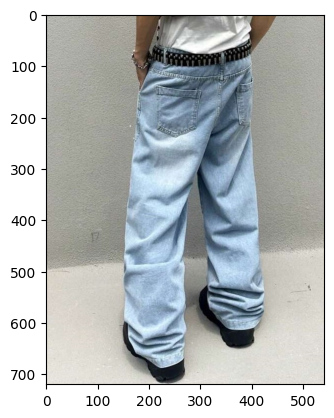

RECOMMENDED JEANS IMAGES:



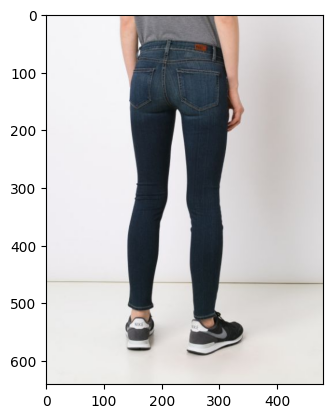

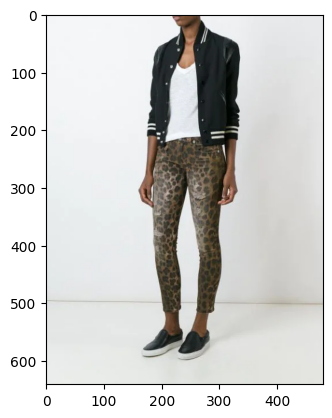

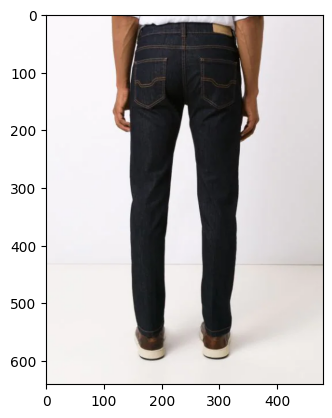

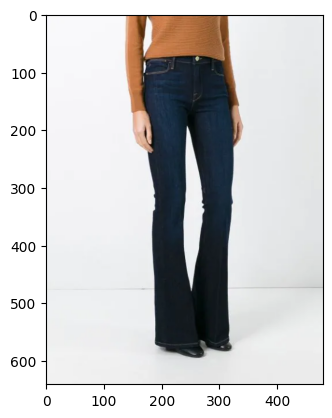

ORIGINAL SOFA IMAGE:



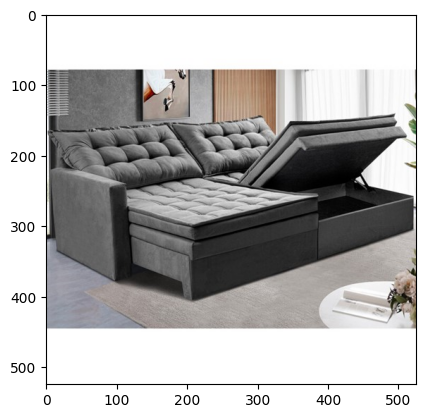

RECOMMENDED SOFA IMAGES:



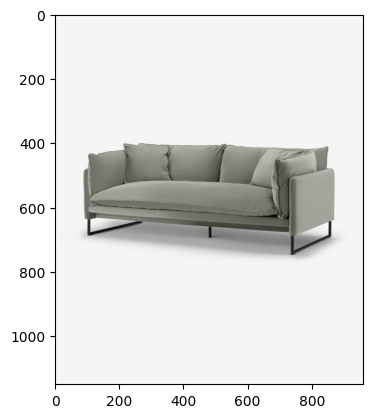

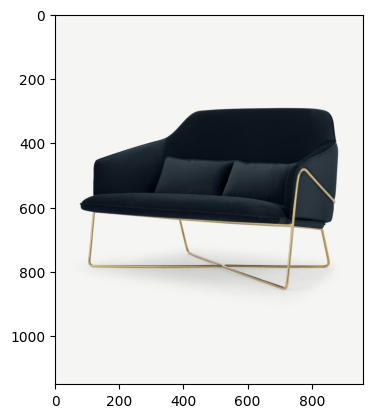

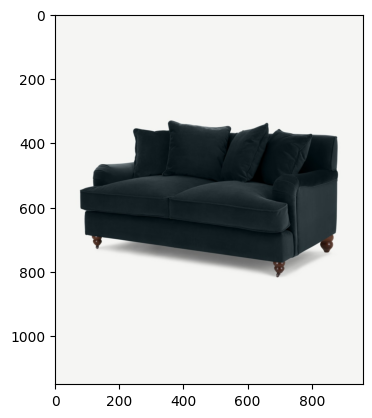

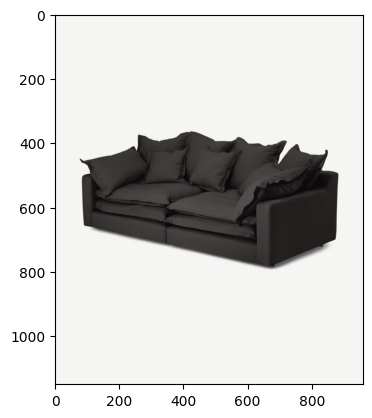

ORIGINAL TSHIRTS IMAGE:



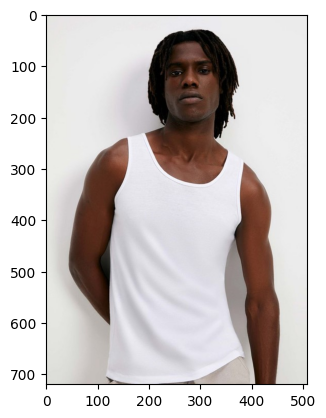

RECOMMENDED TSHIRTS IMAGES:



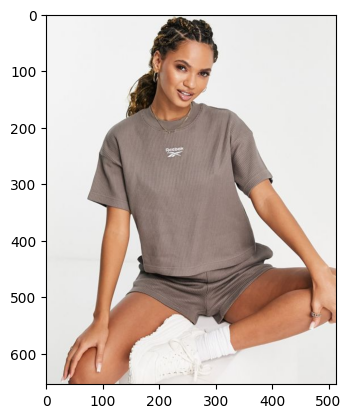

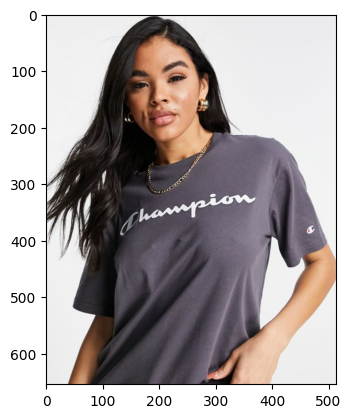

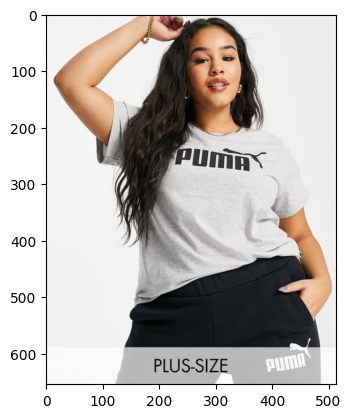

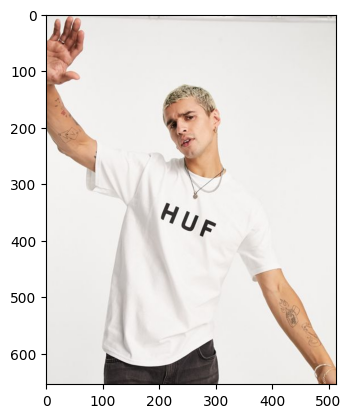

ORIGINAL TV IMAGE:



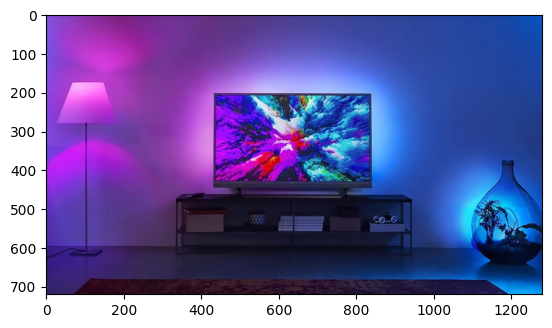

RECOMMENDED TV IMAGES:



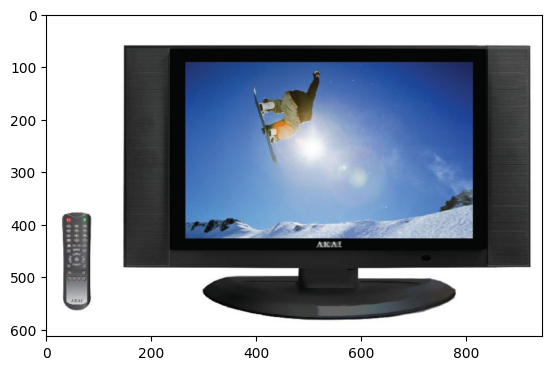

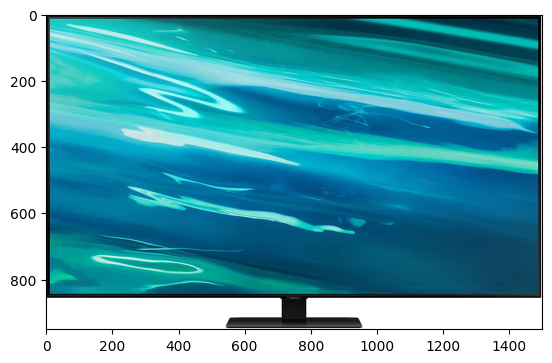

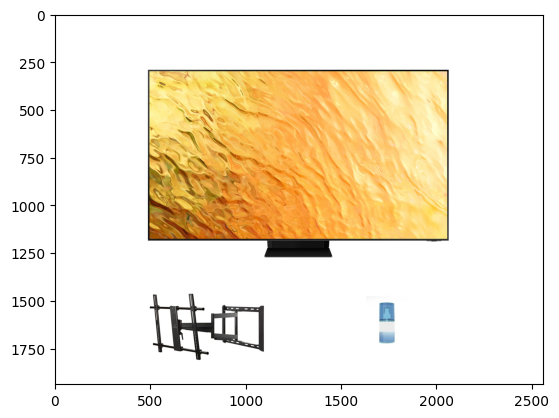

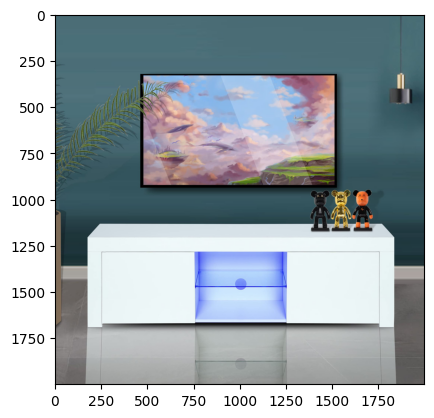

In [16]:
# Jeans Recommendations
import matplotlib.pyplot as plt


print("ORIGINAL JEANS IMAGE:\n")


plt.imshow(plt.imread("/content/drive/MyDrive/E-commerce Dataset/jeans.jpg"))
plt.show()


print("RECOMMENDED JEANS IMAGES:\n")


for file_jeans in indices_jeans[0][1:5]:
  plt.imshow(plt.imread(filename_jeans[file_jeans]))
  plt.show()

# Sofa Recommendations


print("ORIGINAL SOFA IMAGE:\n")


plt.imshow(plt.imread("/content/drive/MyDrive/E-commerce Dataset/sofa.jpg"))
plt.show()


print("RECOMMENDED SOFA IMAGES:\n")
for file_sofa in indices_sofa[0][1:5]:
  plt.imshow(plt.imread(filename_sofa[file_sofa]))
  plt.show()

# Tshirt Recommendations


print("ORIGINAL TSHIRTS IMAGE:\n")


plt.imshow(plt.imread("/content/drive/MyDrive/E-commerce Dataset/camiseta.jpg"))
plt.show()


print("RECOMMENDED TSHIRTS IMAGES:\n")
for file_tshirt in indices_tshirt[0][1:5]:
  plt.imshow(plt.imread(filename_tshirt[file_tshirt]))
  plt.show()

# Tv Recommendations


print("ORIGINAL TV IMAGE:\n")


plt.imshow(plt.imread("/content/drive/MyDrive/E-commerce Dataset/tv.jpg"))
plt.show()


print("RECOMMENDED TV IMAGES:\n")
for file_tv in indices_tv[0][1:5]:
  plt.imshow(plt.imread(filename_tv[file_tv]))
  plt.show()